
<p align="center">
    <img src="https://i.imgur.com/ukBP39X.png" alt="nbrefactor Logo" width="420">
</p>
<br/>
<br/>

# nbrefactor

---

_Refactors Jupyter Notebooks into Python Packages and Modules_

## Set Up

In [10]:
# IMPORTS

import os
import sys

sys.path.append(os.path.abspath(os.path.join('../nbrefactor')))  # for parent-level relative import

from processor import process_notebook



# CONSTANTS & PATHS

SAMPLE_NAME     = 'primary_demo'    # possible options ['primary_demo', 'HiveNAS', 'CS231n_colab', 'markdown_only']
NOTEBOOK_PATH   = f'./examples/sample_{SAMPLE_NAME}.ipynb'
PLOTS_PATH      = './examples/plots/'
PLOTS_FORMAT    = 'pdf'



## Processing / Refactoring

In [11]:

# extract filename and infer output path from the notebook path given in 1.1 Set Up
notebook_filename = os.path.splitext(os.path.basename(NOTEBOOK_PATH))[0]  # filename w/o extension
refactored_path = f'./examples/results/{notebook_filename}_refactored/'

# NBRefactor entry point
root_node = process_notebook(NOTEBOOK_PATH, refactored_path)



Load notebook at (./examples/sample_primary_demo.ipynb)...
Loading complete!



Processing Notebook:   0%|          | 0/38 [00:00<?, ?it/s]

Flushing...

Writing modules...
Writing complete!

--------------------
Warnings: (1)

	MarkdownCommand (Cell #16): An invalid command "$this-is-an-invalid-command" was encountered



## Visualizing Generated Module Tree

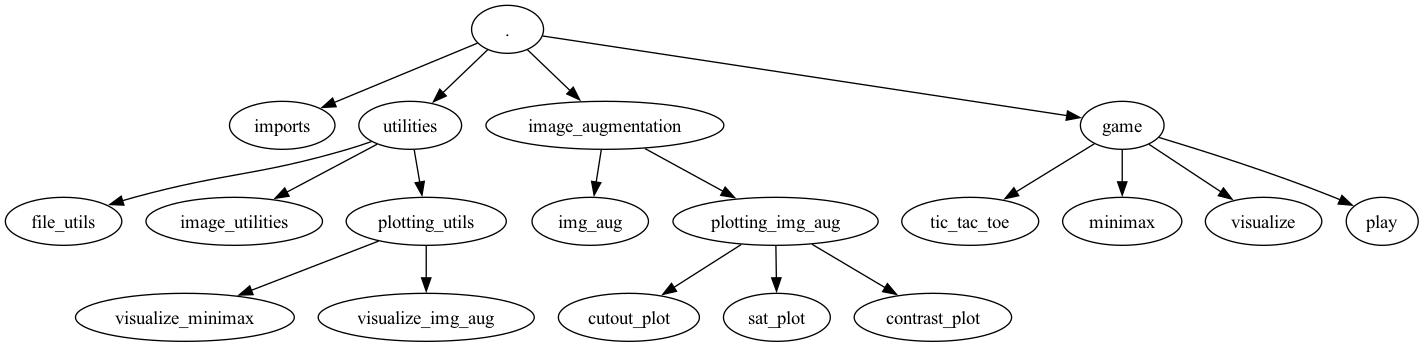

In [12]:
from visualization import plot_module_tree
from fileops import ensure_dir

from IPython.display import display, Image

# ensure existence of the output path
ensure_dir(PLOTS_PATH)
plot_file_path = os.path.join(PLOTS_PATH, notebook_filename)

# init the modules DAG
dag = plot_module_tree(root_node, format=PLOTS_FORMAT)

# render to file
dag.render(plot_file_path, cleanup=True)

# render to IPython Display
img_data = dag.pipe(format='png')
display(Image(img_data))

